<a href="https://colab.research.google.com/github/yenlung/Deep-Learning-Basics/blob/master/colab01b%20%E4%BD%BF%E7%94%A8%E6%88%91%E5%80%91%E8%A8%93%E7%B7%B4%E5%A5%BD%E7%9A%84%E6%A8%A1%E5%9E%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

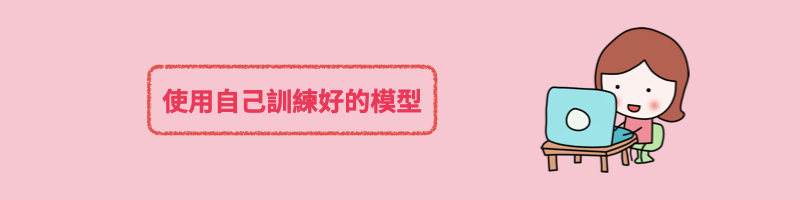

我們看怎麼使用訓練好的模型, 以下的基本套件其實都不用, 這裡只是希望大家養成這種習慣。


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. 安裝 `gradio`

`gradio` 是很酷的套件, 可以幫我們把機器學習的專案神速做成網路 app!

In [ ]:
!pip install gradio

     |████████████████████████████████| 2.5MB 8.4MB/s 
     |████████████████████████████████| 215kB 41.6MB/s 
     |████████████████████████████████| 1.9MB 50.4MB/s 
     |████████████████████████████████| 962kB 47.2MB/s 
     |████████████████████████████████| 3.2MB 48.7MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-cp37-none-any.whl size=4710 sha256=b57fe3f4673dae59fdef103f7c9648b472b6ba21a847720cbafa2b505ed5f4cf
  Stored in directory: /root/.cache/pip/wheels/cc/ac/c4/bef572cb7e52bfca170046f567e64858632daf77e0f34e5a74
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-cp37-none-any.whl size=3372 sha256=91243d99c54e99f4d7863f3631b557bdef54597975ad881afce27e02e18b15e8
  Stored in directory: /root/.cache/pip/wheels/9f/fc/a7/ab5712c3ace9a8f97276465cc2937316ab8063c1fea488ea77
Successfully built ffmpy flask-cachebuster


讀入套件。

In [ ]:
import gradio as gr
from tensorflow.keras.models import load_model

### 2. 讀入我們訓練好的 model

現在連上我們存在 Google Drive 裡的 model, 把它讀回來。

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
model = load_model('my_dnn_model')

### 3. 完成我們的互動 web app!!

用 `gradio` 和用 Jupyter Notebook 互動很類似 -- 都是寫一個函式就能互動!

注意如果用 fashion_mnist, labels 那段改為

```python
labels = ["T-shirt/top（T恤)", "Trouser（褲子)", "Pullover（套衫)", "Dress（裙子)", "Coat（外套)", "Sandal（涼鞋)", "Shirt（汗衫)", "Sneaker（運動鞋)", "Bag（包)", "Ankle boot（踝靴)"]
```

In [ ]:
def recognize_digit(img):
  img = img.reshape(1,784)
  prediction = model.predict(img).flatten()
  labels = list('0123456789')
  return {labels[i]: float(prediction[i]) for i in range(10)}

In [ ]:
iface = gr.Interface(fn=recognize_digit,
                     title="我的手寫辨識 AI",
                     description="請寫入一個數字, 我會辨識是哪一個數字。",
                     inputs="sketchpad", 
                     outputs="label")

iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://26874.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://26874.gradio.app')